### <i> Analyzing Trends Economic and Social Implications and Predictive Modeling For Plastic Waste Around The World </i>
### <i> Import Library Files </i>

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your other code goes below this line


In [2]:
df = pd.read_csv("Plastic Waste Around the World.csv")
df

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low
...,...,...,...,...,...,...
160,Marshall Islands,0.01,Consumer_Packaging,1.8,168.5,High
161,Micronesia,0.01,Consumer_Packaging,1.5,86.3,High
162,Palau,0.01,Consumer_Packaging,12.3,437.2,High
163,Tuvalu,0.01,Consumer_Packaging,1.2,833.3,High


### <i> Datadet Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB


In [4]:
df.describe()

,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG
count,165.000000,165.000000,165.000000
mean,1.723515,13.096364,122.255152
std,6.001944,16.687354,222.849695
min,0.010000,0.100000,2.600000
25%,0.120000,1.200000,17.300000
50%,0.510000,5.400000,54.900000
75%,1.330000,16.400000,127.500000
max,59.080000,84.800000,1564.400000


### <i> Data Preprocessing </i>

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Check for null values
print("\nNull Values in the Dataset:")
print(df.isnull().sum())

# If there are missing values, you can fill or drop them (example: filling with mean for numerical columns)
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on 'Country' and 'Main_Sources'
df['Country_Encoded'] = label_encoder.fit_transform(df['Country'])
df['Main_Sources_Encoded'] = label_encoder.fit_transform(df['Main_Sources'])

# Display the mapping of original values to encoded values for reference
print("\nCountry Encoding Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nMain Sources Encoding Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Drop original columns if needed (optional)
# df.drop(columns=['Country', 'Main_Sources'], inplace=True)

# Display the updated dataset
print("\nUpdated Dataset with Encoded Columns:")
print(df.head())


Dataset Preview:
         Country  Total_Plastic_Waste_MT           Main_Sources  \
0          China                   59.08   Packaging_Industrial   
1  United States                   42.02     Packaging_Consumer   
2          India                   26.33         Consumer_Goods   
3          Japan                    7.99  Packaging_Electronics   
4        Germany                    6.28   Automotive_Packaging   

   Recycling_Rate  Per_Capita_Waste_KG Coastal_Waste_Risk  
0            29.8                 41.2               High  
1            32.1                127.5             Medium  
2            11.5                 19.3               High  
3            84.8                 63.2             Medium  
4            56.1                 75.6                Low  

Null Values in the Dataset:
Country                   0
Total_Plastic_Waste_MT    0
Main_Sources              0
Recycling_Rate            0
Per_Capita_Waste_KG       0
Coastal_Waste_Risk        0
dtype: int64

Country E

### <i> Expolatory Data Analysis EDA </i>

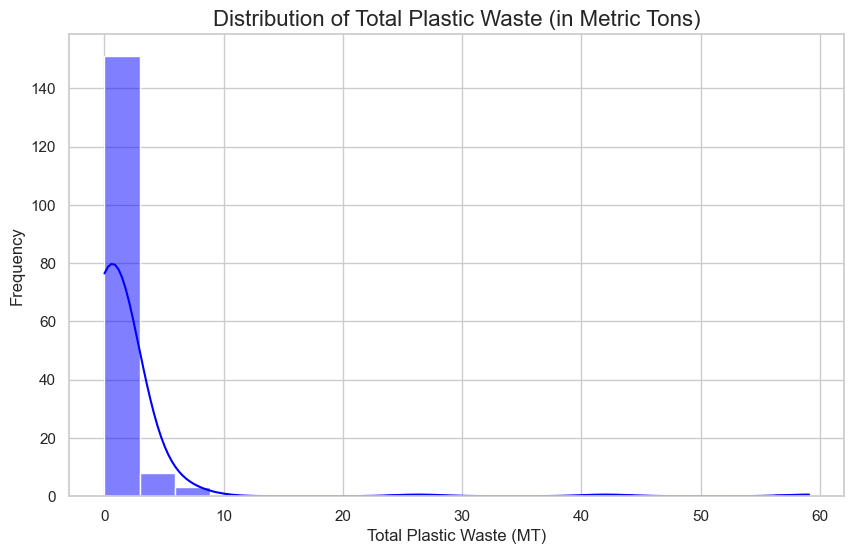

In [6]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Distribution of Total Plastic Waste (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Plastic_Waste_MT'], kde=True, bins=20, color='blue')
plt.title("Distribution of Total Plastic Waste (in Metric Tons)", fontsize=16)
plt.xlabel("Total Plastic Waste (MT)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

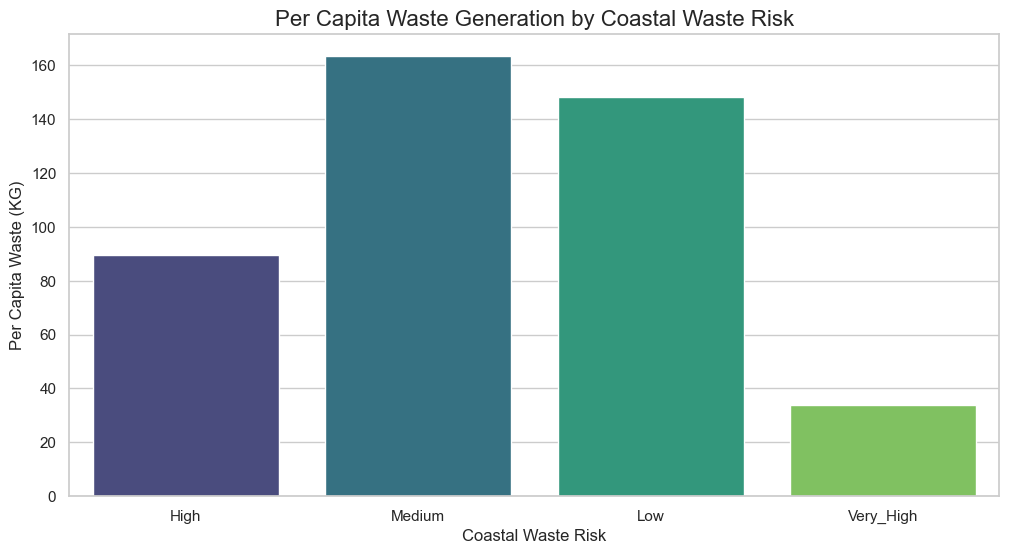

In [7]:
# 3. Per Capita Waste Generation by Coastal Waste Risk (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Coastal_Waste_Risk', y='Per_Capita_Waste_KG', palette='viridis', ci=None)
plt.title("Per Capita Waste Generation by Coastal Waste Risk", fontsize=16)
plt.xlabel("Coastal Waste Risk", fontsize=12)
plt.ylabel("Per Capita Waste (KG)", fontsize=12)
plt.show()

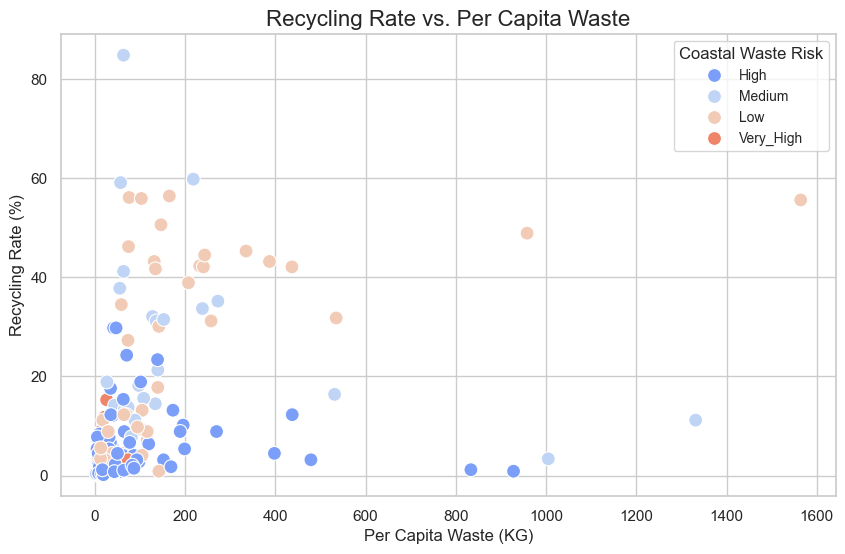

In [8]:
# 4. Recycling Rate vs. Per Capita Waste (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Per_Capita_Waste_KG', y='Recycling_Rate', hue='Coastal_Waste_Risk', palette='coolwarm', s=100)
plt.title("Recycling Rate vs. Per Capita Waste", fontsize=16)
plt.xlabel("Per Capita Waste (KG)", fontsize=12)
plt.ylabel("Recycling Rate (%)", fontsize=12)
plt.legend(title="Coastal Waste Risk", fontsize=10)
plt.show()

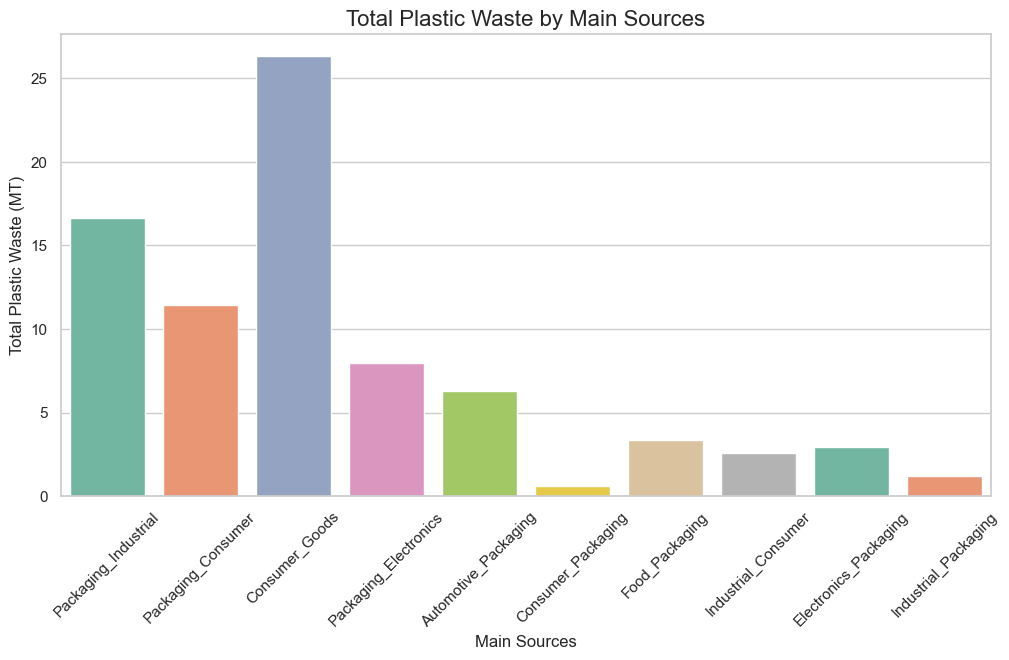

In [9]:
# 5. Total Plastic Waste by Main Sources (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Main_Sources', y='Total_Plastic_Waste_MT', palette='Set2', ci=None)
plt.title("Total Plastic Waste by Main Sources", fontsize=16)
plt.xlabel("Main Sources", fontsize=12)
plt.ylabel("Total Plastic Waste (MT)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

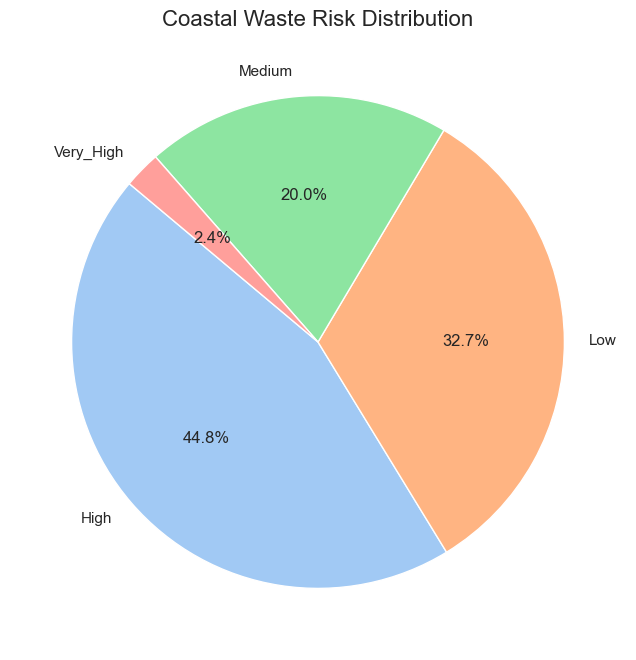

In [10]:
# 7. Coastal Waste Risk Count (Pie Chart)
plt.figure(figsize=(8, 8))
risk_counts = df['Coastal_Waste_Risk'].value_counts()
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Coastal Waste Risk Distribution", fontsize=16)
plt.show()

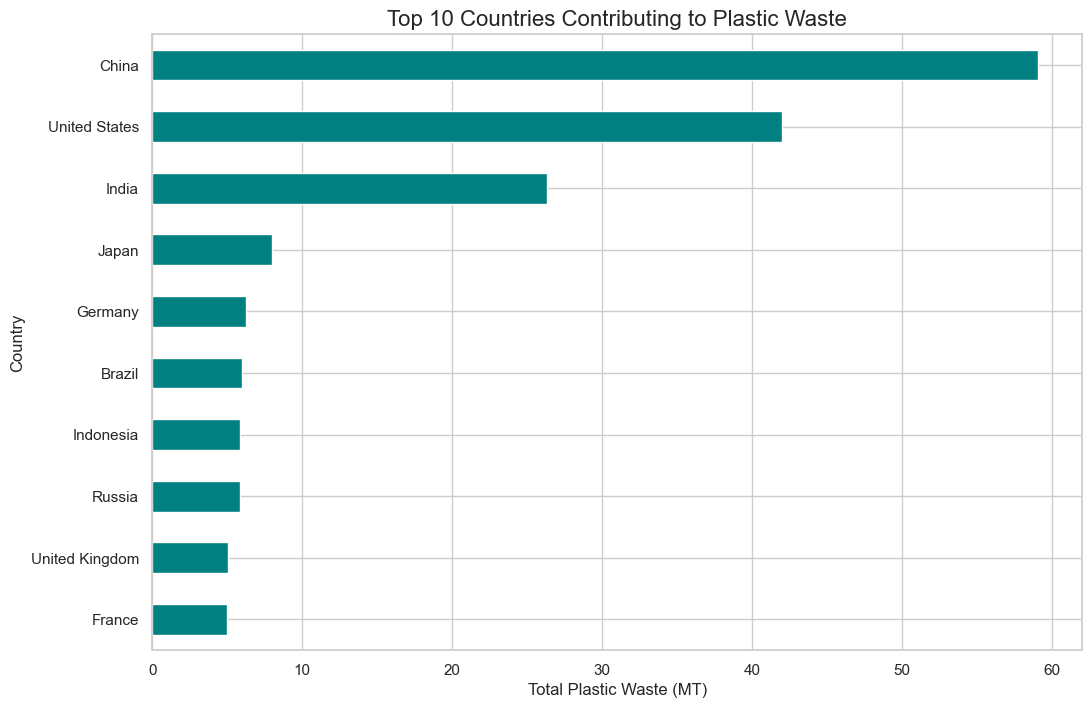

In [11]:
# 10. Country Contribution to Plastic Waste (Horizontal Bar Plot)
top_countries = df.groupby("Country")["Total_Plastic_Waste_MT"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_countries.plot(kind="barh", color="teal")
plt.title("Top 10 Countries Contributing to Plastic Waste", fontsize=16)
plt.xlabel("Total Plastic Waste (MT)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Encode the target column
label_encoder = LabelEncoder()
df['Coastal_Waste_Risk_Encoded'] = label_encoder.fit_transform(df['Coastal_Waste_Risk'])

# Features and target
X = df[['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG', 'Country_Encoded', 'Main_Sources_Encoded']]
y = df['Coastal_Waste_Risk_Encoded']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.50      0.92      0.65        12
           1       0.56      0.45      0.50        11
           2       1.00      0.22      0.36         9
           3       0.00      0.00      0.00         1

    accuracy                           0.55        33
   macro avg       0.51      0.40      0.38        33
weighted avg       0.64      0.55      0.50        33

Accuracy: 0.5454545454545454


### <i> Random Forest Classifier </i>

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.50      0.92      0.65        12
           1       0.57      0.36      0.44        11
           2       0.67      0.22      0.33         9
           3       1.00      1.00      1.00         1

    accuracy                           0.55        33
   macro avg       0.68      0.63      0.61        33
weighted avg       0.58      0.55      0.50        33

Accuracy: 0.5454545454545454


### <i> Gradient Boosting Classifier </i>

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Classifier Results:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))



Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

           0       0.50      0.83      0.62        12
           1       0.56      0.45      0.50        11
           2       1.00      0.33      0.50         9
           3       1.00      1.00      1.00         1

    accuracy                           0.58        33
   macro avg       0.76      0.66      0.66        33
weighted avg       0.67      0.58      0.56        33

Accuracy: 0.5757575757575758


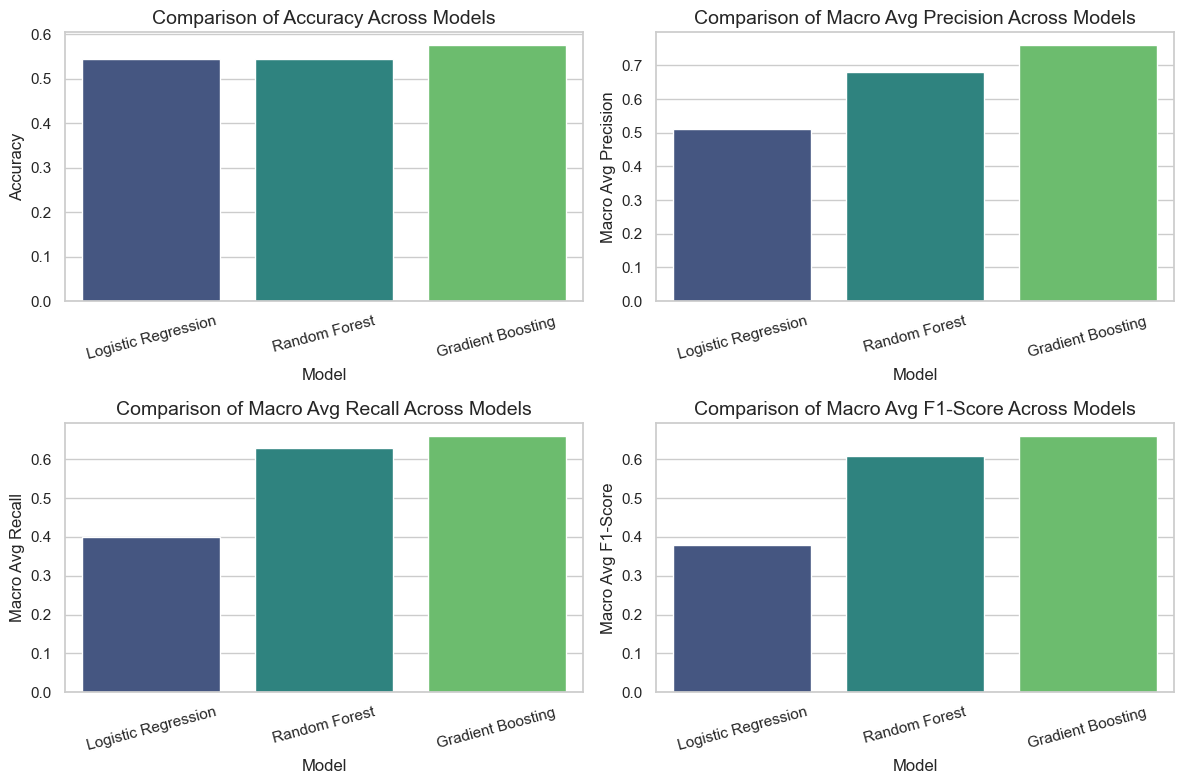

Best Model Based on Accuracy:
Model                  Gradient Boosting
Accuracy                           0.576
Macro Avg Precision                 0.76
Macro Avg Recall                    0.66
Macro Avg F1-Score                  0.66
Name: 2, dtype: object


In [15]:
import numpy as np

# Store the results
results = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": [0.545, 0.545, 0.576],
    "Macro Avg Precision": [0.51, 0.68, 0.76],
    "Macro Avg Recall": [0.40, 0.63, 0.66],
    "Macro Avg F1-Score": [0.38, 0.61, 0.66],
}

# Convert to a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Visualize comparison with histograms
metrics = ["Accuracy", "Macro Avg Precision", "Macro Avg Recall", "Macro Avg F1-Score"]

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
    plt.title(f"Comparison of {metric} Across Models", fontsize=14)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# Determine the best model based on accuracy
best_model = results_df.iloc[results_df["Accuracy"].idxmax()]
print("Best Model Based on Accuracy:")
print(best_model)
